# <font color='blue'>Breast Cancer Wisconsin (Diagnostic)</font>

This dataset dates from 1995 and is part of UCI Machine Learning Repository. It contains 30 features with different characteristics of the cell nuclei drawn from a digitized image of a fine needle aspirate (FNA) of a breast mass.


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

#### Dataset description:

This dataset contains 569 instances and 32 columns (ID, diagnosis, 30 real-valued input features).

The following features were computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

Several of the papers listed below contain detailed descriptions of
how these features are computed. 

#### References:

UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Relevant Papers:

First Usage: 

W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993. 

O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995. 

Medical literature: 

W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171. 

W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, Vol. 17 No. 2, pages 77-87, April 1995. 

W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computerized breast cancer diagnosis and prognosis from fine needle aspirates. Archives of Surgery 1995;130:511-516. 

W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computer-derived nuclear features distinguish malignant from benign breast cytology. Human Pathology, 26:792--796, 1995. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('bc_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [5]:
del data['id']
data['diagnosis'].replace({'B':0, 'M':1}, inplace = True)

In [6]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [8]:
def check_missing(dataset, display = 5):
    temp_df = dataset.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Great! There are no missing values in this dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)
    
check_missing(data)

Great! There are no missing values in this dataset.


Class 0: 357 (62.74%)
Class 1: 212 (37.26%)


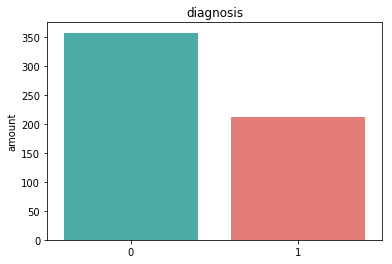

In [9]:
# Function to check the output variable
def check_output(dataset, output):
    amount = dataset[output].value_counts()
    ratio =  dataset[output].value_counts(normalize = True)*100
    print('Class 0: {} ({}%)'.format(amount[0], round(ratio[0],2)))
    print('Class 1: {} ({}%)'.format(amount[1], round(ratio[1],2)))

    labels = ['1' if label == 1 else '0' for label in dataset[output]]
    palette = {'1': '#f56b69', '0': '#3bbbb3'}

    ax = sns.countplot(labels, palette=palette)
    plt.title(output)
    plt.ylabel('amount')
    return plt.show()

check_output(data, 'diagnosis')

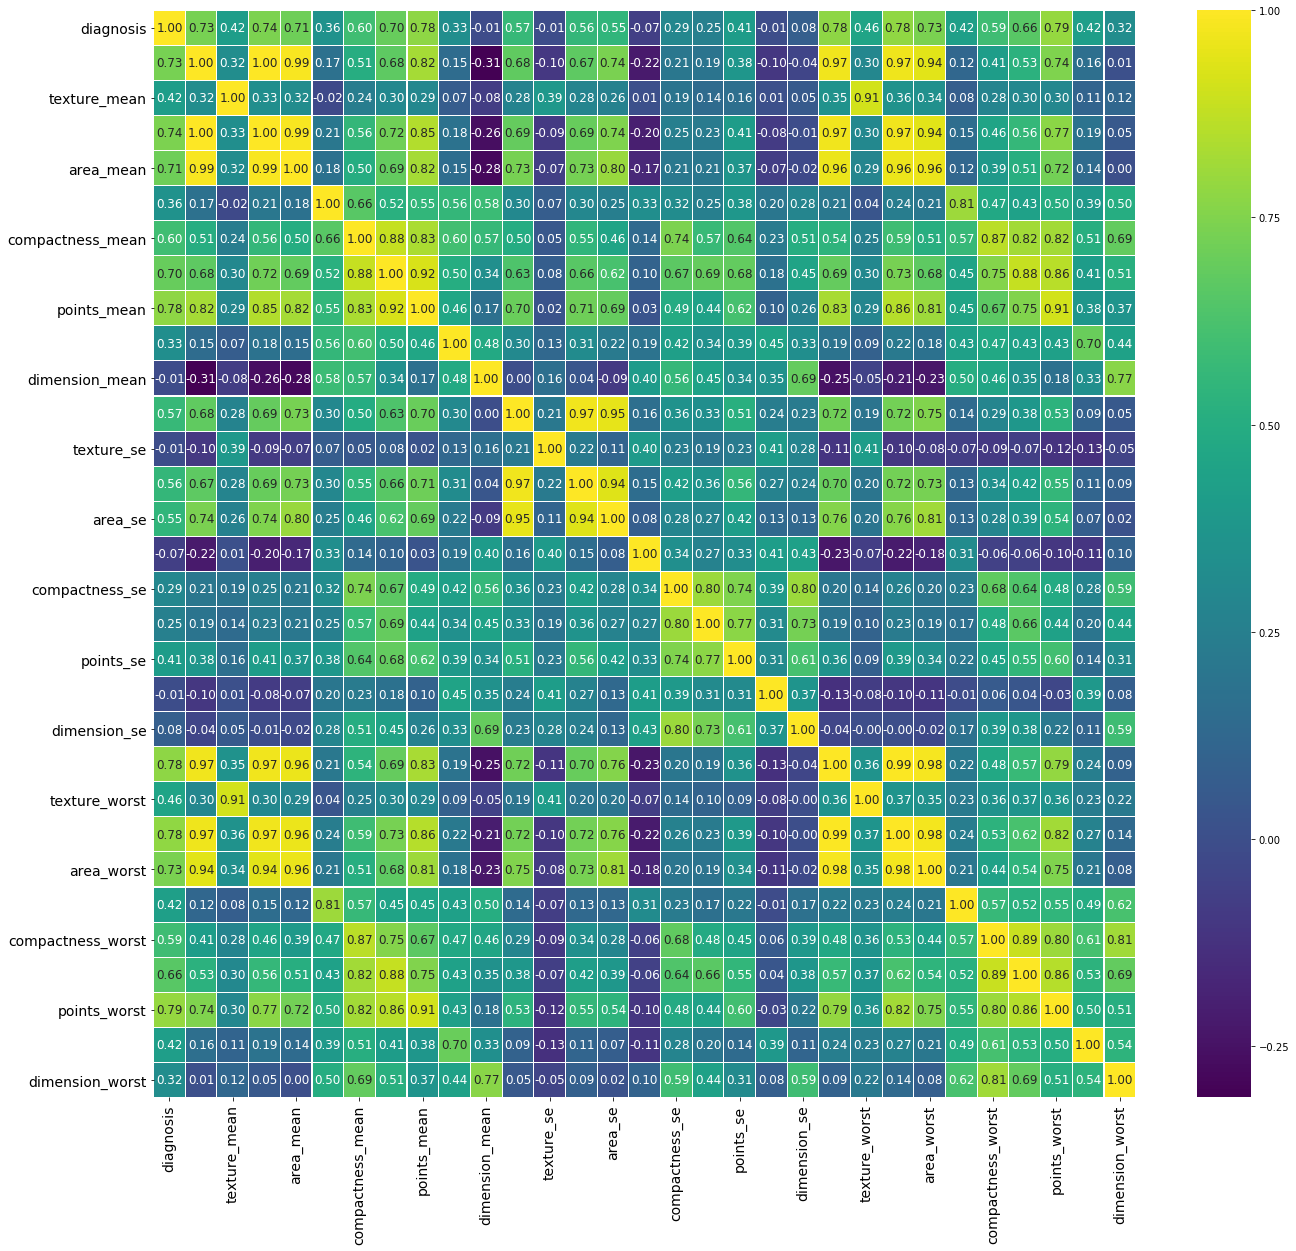

In [10]:
# Calculates the correlation and plot the data in s heatmap
sns.heatmap(data.corr(), annot = True, cmap = 'viridis', linewidths = 0.1, annot_kws = {'size':12}, fmt = '.2f')
fig = plt.gcf()
fig.set_size_inches(22, 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer

select = [c for c in data.columns if c not in ['diagnosis']]
    
scaler_x = StandardScaler()
normal_x = Normalizer()

scaler_y = StandardScaler()
normal_y = Normalizer()

df_normalized = pd.DataFrame(scaler_x.fit_transform(data[select]))
df_transformed = pd.DataFrame(normal_x.fit_transform(df_normalized))
df_transformed.columns = select
data[select] = df_transformed

## Model 1

In [12]:
from sklearn.model_selection import train_test_split

features = [c for c in data.columns if c not in ['diagnosis']]



X_train, X_test, y_train, y_test = train_test_split(data[features], data['diagnosis'], test_size = 0.33, random_state = 42)
print(X_train.shape)

(381, 30)


In [13]:
# Keras e TensorFlow
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))     
model.add(Dense(1, activation = 'sigmoid'))                
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train.as_matrix(), y_train, epochs = 1)

Epoch 1/1
381/381 [==============================] - 0s 1ms/step - loss: 0.6779 - acc: 0.6588


Loss/Accuracy:  [0.6475723766266032, 0.7765957472172189]
Average precision-recall score: 0.36
AUC: 0.50

Confusion matrix:

 Predicted    0  1  __all__
Actual                    
0          121  0      121
1           67  0       67
__all__    188  0      188


/Users/Daniela/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


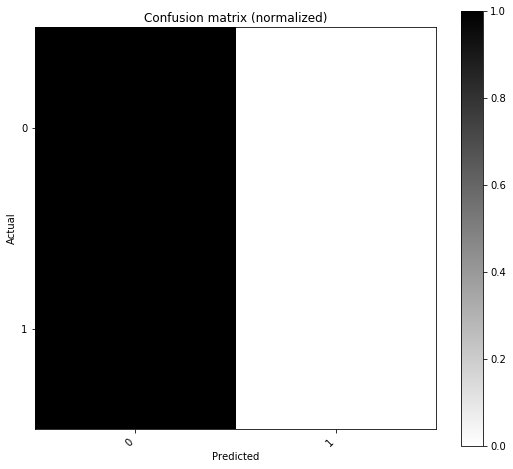

Confusion Matrix:

Predicted    0  1  __all__
Actual                    
0          121  0      121
1           67  0       67
__all__    188  0      188


Overall Statistics:

Accuracy: 0.6436170212765957
95% CI: (0.5706509149486712, 0.7119743787162225)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1
Population                                  188       188
P: Condition positive                       121        67
N: Condition negative                        67       121
Test outcome positive                       188         0
Test outcome negative                         0       188
TP: True Positive                           121         0
TN: True Negative                             0       121
FP: False Positive                           67         0
FN: False Negative                            0        67
TPR: (Sensitivity, hit rate, recall)          1      

/Users/Daniela/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
/Users/Daniela/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FNR) / self.TNR)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:251: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FN) / self.NegativeTest)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Us

In [15]:
from pandas_ml import ConfusionMatrix
from sklearn.metrics import average_precision_score, roc_auc_score

print("Loss/Accuracy: ", model.evaluate(X_test.as_matrix(), y_test, verbose = 0))

# Predicting frauds in the test dataset
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

average_precision = average_precision_score(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('AUC: {0:0.2f}'.format(roc_auc))


# Plotting a confusion matrix
y_true = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_true, y_predicted)
print("\nConfusion matrix:\n\n {}" .format(confusion_matrix))
confusion_matrix.plot(normalized = True)
plt.show()
confusion_matrix.print_stats()

## Model 2

In [16]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data[features], data['diagnosis'], test_size = 0.33, random_state = 42)

model2 = Sequential()
model2.add(Dense(30, input_dim = X_train.shape[1], activation = 'tanh')) 
model2.add(Dense(27, activation = 'tanh'))
model2.add(Dense(16, activation = 'tanh'))
model2.add(Dense(2, activation = 'tanh'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 27)                837       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                448       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 2,252
Trainable params: 2,252
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.fit(X2_train, y2_train, epochs = 15)

Epoch 1/15
381/381 [==============================] - 1s 3ms/step - loss: 0.5766 - acc: 0.8740
Epoch 2/15
381/381 [==============================] - 0s 76us/step - loss: 0.4288 - acc: 0.9239
Epoch 3/15
381/381 [==============================] - 0s 72us/step - loss: 0.3578 - acc: 0.9344
Epoch 4/15
381/381 [==============================] - 0s 75us/step - loss: 0.3242 - acc: 0.9449
Epoch 5/15
381/381 [==============================] - 0s 77us/step - loss: 0.3044 - acc: 0.9528
Epoch 6/15
381/381 [==============================] - 0s 67us/step - loss: 0.2881 - acc: 0.9580
Epoch 7/15
381/381 [==============================] - 0s 69us/step - loss: 0.2755 - acc: 0.9685
Epoch 8/15
381/381 [==============================] - 0s 78us/step - loss: 0.2663 - acc: 0.9738
Epoch 9/15
381/381 [==============================] - 0s 69us/step - loss: 0.2558 - acc: 0.9738
Epoch 10/15
381/381 [==============================] - 0s 68us/step - loss: 0.2486 - acc: 0.9738
Epoch 11/15
381/381 [===================

In [18]:
print("Loss: ", model2.evaluate(X2_test, y2_test, verbose = 0))

y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y2_test)

# Calculates precision-recall score and auc
average_precision2 = average_precision_score(y2_correct, y2_predicted)
roc_auc2 = roc_auc_score(y2_test, y2_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision2))
print('AUC: {0:0.2f}'.format(roc_auc2))

Loss:  [0.20012415057801186, 0.9893617046640274]
Average precision-recall score: 0.98
AUC: 0.99


Confusion matrix: 

Predicted  False  True  __all__
Actual                         
False        120     1      121
True           1    66       67
__all__      121    67      188


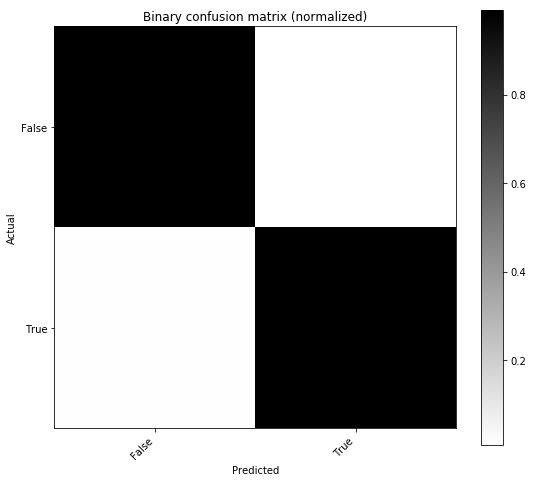

population: 188
P: 67
N: 121
PositiveTest: 67
NegativeTest: 121
TP: 66
TN: 120
FP: 1
FN: 1
TPR: 0.9850746268656716
TNR: 0.9917355371900827
PPV: 0.9850746268656716
NPV: 0.9917355371900827
FPR: 0.008264462809917356
FDR: 0.014925373134328358
FNR: 0.014925373134328358
ACC: 0.9893617021276596
F1_score: 0.9850746268656716
MCC: 0.9768101640557543
informedness: 0.9768101640557543
markedness: 0.9768101640557543
prevalence: 0.35638297872340424
LRP: 119.19402985074626
LRN: 0.015049751243781094
DOR: 7920.0
FOR: 0.008264462809917356


In [19]:
# Plotting a confusion matrix
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix: \n\n{}"  .format(confusion_matrix2))
confusion_matrix2.plot(normalized = True)
plt.show()
confusion_matrix2.print_stats()